## 特徵選擇 (Feature Selection)

In [1]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/python_for_data_science/master/Data/customer_behavior.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
bachelor     12 non-null int64
gender       12 non-null int64
age          12 non-null int64
salary       12 non-null int64
purchased    12 non-null int64
dtypes: int64(5)
memory usage: 560.0 bytes


In [3]:
X = df[['bachelor','gender', 'age', 'salary']]

In [4]:
X

,bachelor,gender,age,salary
0,1,0,23,1500
1,1,0,30,2500
2,1,0,32,1800
3,1,0,25,1700
4,1,0,27,1200
5,1,1,26,1000
6,1,1,35,3500
7,1,0,23,2000
8,1,0,22,1800
9,1,0,21,1700


In [6]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold()


In [7]:
sel

VarianceThreshold(threshold=0.0)

In [11]:
X.var()

bachelor    0.000000e+00
gender      2.424242e-01
age         3.324242e+01
salary      1.292955e+06
dtype: float64

In [8]:
X_val = sel.fit_transform(X)


In [9]:
sel

VarianceThreshold(threshold=0.0)

In [10]:
X_val

array([[   0,   23, 1500],
       [   0,   30, 2500],
       [   0,   32, 1800],
       [   0,   25, 1700],
       [   0,   27, 1200],
       [   1,   26, 1000],
       [   1,   35, 3500],
       [   0,   23, 2000],
       [   0,   22, 1800],
       [   0,   21, 1700],
       [   1,   38, 5000],
       [   1,   20, 1200]])

In [18]:
#df.columns
#sel.get_support()
df.loc[:,sel.get_support()]

,gender,age,salary
0,0,23,1500
1,0,30,2500
2,0,32,1800
3,0,25,1700
4,0,27,1200
5,1,26,1000
6,1,35,3500
7,0,23,2000
8,0,22,1800
9,0,21,1700


In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [20]:
X = df[['bachelor','gender', 'age', 'salary']]


In [21]:
y = df['purchased'].values


In [22]:
clf = SelectKBest(chi2, k=2)
clf.fit(X,y)


SelectKBest(k=2, score_func=<function chi2 at 0x1258d2840>)

In [23]:
clf.scores_

array([   0.        ,    0.        ,    4.48447205, 2766.66666667])

In [25]:
X_new = clf.fit_transform(X,y)
print(X_new[0:3,:])


[[  23 1500]
 [  30 2500]
 [  32 1800]]


In [31]:
a = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7']
from itertools import combinations
ary = []
for i in range(1,6):
    ary += combinations(a,i)

In [32]:
len(ary)

119

In [33]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

clf = SVC(kernel='linear')

rfe = RFE(clf, n_features_to_select=1)
rfe.fit(X_val,y)


RFE(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
  n_features_to_select=1, step=1, verbose=0)

In [34]:
rfe.ranking_

array([3, 2, 1])

In [35]:
rfe.support_

array([False, False,  True])

In [39]:
names = ['gender', 'age', 'salary']

In [51]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, random_state=123)

clf.fit(X_val, y)

#names, clf.feature_importances_
for feature in zip(names, clf.feature_importances_):
    print(feature)


('gender', 0.0933015873015873)
('age', 0.39391203703703703)
('salary', 0.5127863756613757)


In [52]:
importance = clf.feature_importances_


Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


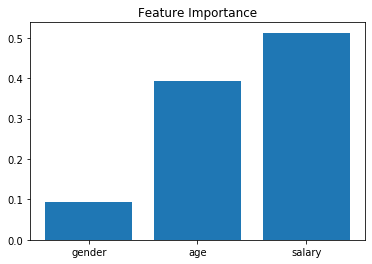

In [53]:
% pylab inline
import matplotlib.pyplot as plt
plt.title('Feature Importance')
plt.bar(range(0, len(names)), importance)
plt.xticks(range(0,len(names)), names)
plt.show()


## 小任務
- 請使用 rfe 找出 iris 資料中，哪兩個欄位最重要?

In [54]:
from sklearn.datasets import load_iris
iris= load_iris()

In [58]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [59]:
clf = DecisionTreeClassifier()

rfe = RFE(clf, n_features_to_select=2)
rfe.fit(iris.data,iris.target)


RFE(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
  n_features_to_select=2, step=1, verbose=0)

In [60]:
rfe.get_support()

array([False, False,  True,  True])

In [61]:
rfe.ranking_

array([3, 2, 1, 1])

In [62]:
from sklearn.feature_selection import RFECV

In [63]:
rfe = RFECV(clf, step=1, cv=5)

In [64]:
rfe.fit(iris.data,iris.target)

RFECV(cv=5,
   estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [65]:
rfe.get_support()

array([ True,  True,  True,  True])

In [66]:
rfe.ranking_

array([1, 1, 1, 1])

## 特徵萃取

In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [69]:
X = iris.data
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [70]:
X_reduced = pca.transform(X)

In [71]:
X.shape

(150, 4)

In [72]:
X_reduced.shape

(150, 2)

In [78]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [80]:
X[0:3,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [79]:
X_reduced[0:3,:]

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561]])

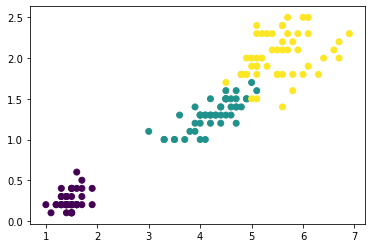

In [84]:
from matplotlib import pyplot as plt
X = iris.data[:,[2,3]]
plt.scatter(X[:,0], X[:,1], c =iris.target)

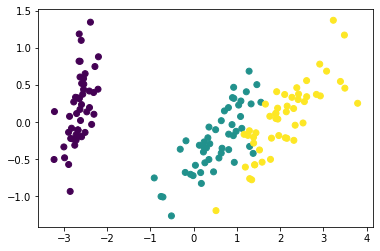

In [89]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], c =iris.target)

In [90]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf')
clf.fit(X_reduced , iris.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

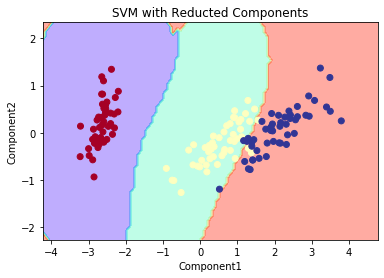

In [91]:
import numpy as np
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

plt.plot()
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=iris.target, alpha=1, cmap = plt.cm.RdYlBu)
plt.title('SVM with Reducted Components')
plt.xlabel('Component1')
plt.ylabel('Component2')
plt.show()

In [92]:
pca.explained_variance_

array([4.22484077, 0.24224357])

In [93]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

In [94]:
pca.explained_variance_ratio_.sum()

0.9776317750248034

In [95]:
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component, iris.feature_names)))


0.362 x sepal length (cm) + -0.082 x sepal width (cm) + 0.857 x petal length (cm) + 0.359 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.176 x petal length (cm) + -0.075 x petal width (cm)


In [99]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [96]:
X_reduced[0:3,:]

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561]])

In [98]:
iris.data[0:3,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [100]:
pca.explained_variance_

array([4.22484077, 0.24224357])

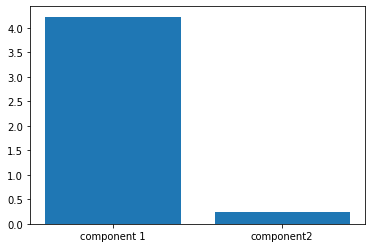

In [101]:
plt.bar(range(0,2), pca.explained_variance_)
plt.xticks(range(0,2), ['component 1', 'component2'])
plt.show()


In [102]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/taipeifubon/master/data/20150628news.xlsx', index_col = 0)

In [103]:
news.head()

,category,description,pubdate,title
0,社會/生活,新北市八仙水上樂園昨晚發生粉塵爆炸，新北市衛生局統計到目前為止，由救護車送醫再加上自行送醫的...,"Sun, 28 Jun 2015 07:40:00 +0800",八仙塵爆 五相關人依公共危險重傷害法辦
1,社會/生活,新北市八仙樂園昨天晚上(6/27)舉辦活動，過程中噴灑大量玉米粉而引發粉塵爆炸，根據最新統計...,"Sun, 28 Jun 2015 07:40:00 +0800",八仙樂園意外 病患持續增加中
2,財經/要聞,希臘債務違約限期逼近，資金持續外流。路透社引述三間銀行的消息指出，希臘國內有3分之1的自動櫃...,"Sun, 28 Jun 2015 07:40:00 +0800",希臘國內三分一自動櫃員機現金短缺
3,社會/生活,台鐵「新基隆車站」第一階段工程本月底完成，台鐵表示，明天（29號）啟用後，由於南站周邊道路尚...,"Sun, 28 Jun 2015 07:40:00 +0800",台鐵新基隆車站29日正式啟用
4,財經/要聞,《中國時報》\n●樂園變煉獄 派對驚爆 逾300人遭火紋身\n八仙樂園昨晚舉辦「COLOR ...,"Sun, 28 Jun 2015 07:38:17 +0800",6月28日各報頭版要聞


In [104]:
import jieba
corpus = []
for idx, rec in news.iterrows():
    corpus.append(' '.join(jieba.cut(rec['description'])))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/46/b7dzk4mn6g54qzptv608w7d00000gn/T/jieba.cache
Loading model cost 0.667 seconds.
Prefix dict has been built succesfully.


In [106]:
from sklearn.feature_extraction.text import CountVectorizer
clf = CountVectorizer()
X = clf.fit_transform(corpus)

In [109]:
from sklearn.metrics.pairwise import cosine_distances
cs = cosine_distances(X)

In [110]:
cs.shape

(147, 147)

In [111]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
cs_reduced = pca.fit_transform(cs)

In [114]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
groups = kmeans.fit_predict(cs_reduced)

In [115]:
cs_reduced.shape

(147, 2)

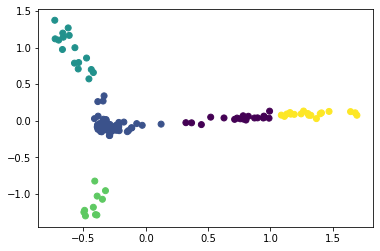

In [116]:
plt.scatter(cs_reduced[:,0], cs_reduced[:,1], c = groups)

In [118]:
pca.explained_variance_

array([0.40598142, 0.20757363])

In [119]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
cs_reduced = pca.fit_transform(cs)

In [122]:
pca.explained_variance_[0:5].sum()

0.8440332539309572

## SVD

In [123]:
from scipy.linalg import svd

In [126]:
X = iris.data

In [127]:
X.shape

(150, 4)

In [128]:
U, S, V = svd(X, full_matrices=False)

In [129]:
U.shape

(150, 4)

In [130]:
S.shape

(4,)

In [131]:
V.shape

(4, 4)

In [134]:
V

array([[-0.75116805, -0.37978837, -0.51315094, -0.16787934],
       [ 0.28583096,  0.54488976, -0.70889874, -0.34475845],
       [ 0.49942378, -0.67502499, -0.05471983, -0.54029889],
       [ 0.32345496, -0.32124324, -0.48077482,  0.74902286]])

In [136]:
S

array([95.95066751, 17.72295328,  3.46929666,  1.87891236])

In [135]:
np.diag(S)

array([[95.95066751,  0.        ,  0.        ,  0.        ],
       [ 0.        , 17.72295328,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  3.46929666,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.87891236]])

In [142]:
a = np.array([[1,2], [3,4]])
a.shape

(2, 2)

In [144]:
a

array([[1, 2],
       [3, 4]])

In [141]:
b = np.array([[5],[6]])
b.shape

(2, 1)

In [145]:
b

array([[5],
       [6]])

In [143]:
a.dot(b)

array([[17],
       [39]])

In [147]:
m = np.dot(U.dot(np.diag(S)), V)

In [148]:
iris.data[0:3,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [149]:
m[0:3,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [150]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(2)
X = svd.fit_transform(iris.data)


In [152]:
X[0:3,:]

array([[5.91220352, 2.30344211],
       [5.57207573, 1.97383104],
       [5.4464847 , 2.09653267]])

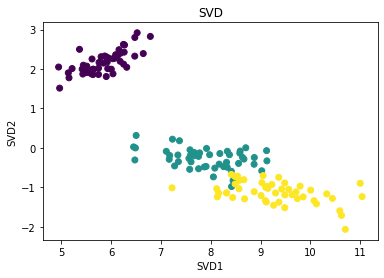

In [153]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=iris.target)
plt.xlabel('SVD1')
plt.ylabel('SVD2')
plt.title('SVD')
plt.show()


In [154]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf')
clf.fit(X, iris.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

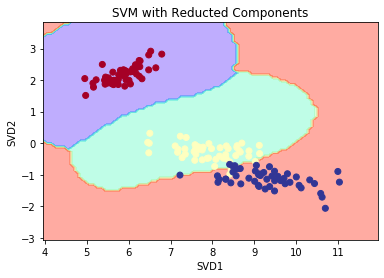

In [155]:
import numpy as np
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

plt.plot()
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)
plt.scatter(X[:, 0], X[:, 1], c=iris.target, alpha=1, cmap = plt.cm.RdYlBu)
plt.title('SVM with Reducted Components')
plt.xlabel('SVD1')
plt.ylabel('SVD2')
plt.show()

## 使用SVD 壓縮圖片
- https://s.yimg.com/ny/api/res/1.2/_mOAIJcHFUmKnSyOG2AT3g--~A/YXBwaWQ9aGlnaGxhbmRlcjtzbT0xO3c9ODAw/https://media.zenfs.com/zh-TW/ctwant_com_582/8e84f9b5c556c8ba5f95e99feb2770b0

In [156]:
import requests
res = requests.get('https://s.yimg.com/ny/api/res/1.2/_mOAIJcHFUmKnSyOG2AT3g--~A/YXBwaWQ9aGlnaGxhbmRlcjtzbT0xO3c9ODAw/https://media.zenfs.com/zh-TW/ctwant_com_582/8e84f9b5c556c8ba5f95e99feb2770b0')
with open('test.jpg', 'wb') as f:
    f.write(res.content)

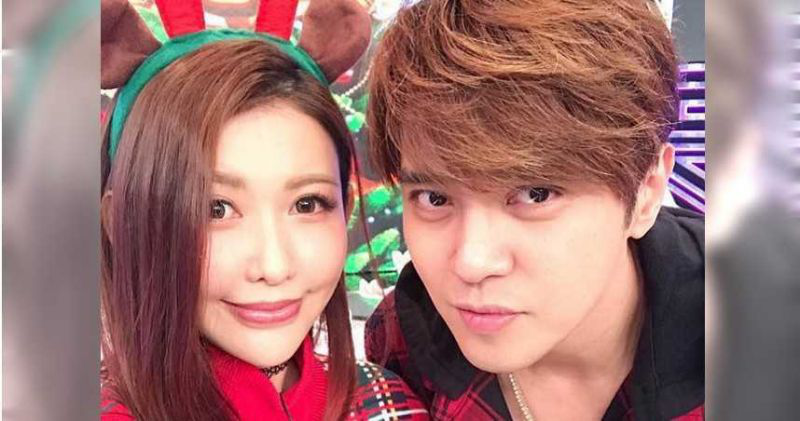

In [159]:
from PIL import Image
img = Image.open('test.jpg')
img

In [163]:
import numpy as np
imgary = np.array(img)
imgary.shape

(421, 800, 3)

In [166]:
#imgarr

In [167]:
imgary = imgary / 255

In [190]:
original_bytes = imgary.nbytes

In [169]:
img_red   = imgary[:, :, 0]
img_green = imgary[:, :, 1]
img_blue  = imgary[:, :, 2]

In [170]:
img_red.shape

(421, 800)

In [171]:
from numpy.linalg import svd

U_r, S_r, V_r = svd(img_red, full_matrices=True)
U_g, S_g, V_g = svd(img_green, full_matrices=True)
U_b, S_b, V_b = svd(img_blue, full_matrices=True)

In [172]:
U_r.shape

(421, 421)

In [173]:
S_r.shape

(421,)

In [174]:
V_r.shape

(800, 800)

In [175]:
k = 100

In [176]:
U_r_k = U_r[:, 0:k]
V_r_k = V_r[0:k, :]
U_g_k = U_g[:, 0:k]
V_g_k = V_g[0:k, :]
U_b_k = U_b[:, 0:k]
V_b_k = V_b[0:k, :]

In [177]:
U_r_k.shape

(421, 100)

In [178]:
V_r_k.shape

(100, 800)

In [ ]:
#    U       *     S     *    v = (421 * 800)
#421 * 100,        ?      , 100 * 800
#S = 100 * 100

In [179]:
S_r_k = S_r[0:k]
S_g_k = S_g[0:k]
S_b_k = S_b[0:k]

In [180]:
S_r_k.shape

(100,)

In [181]:
#U = (421 * 421)
#S = (421,)
#V = (800 * 800)

#U_k = (421 * 100)
#S_k = (100,)
#V_k = (100 * 800)


In [182]:
image_red_approx   = np.dot(U_r_k, np.dot(numpy.diag(S_r_k), V_r_k))
image_green_approx = np.dot(U_g_k, np.dot(numpy.diag(S_g_k), V_g_k))
image_blue_approx  = np.dot(U_b_k, np.dot(numpy.diag(S_b_k), V_b_k))

In [183]:
image_red_approx.shape

(421, 800)

In [184]:
row, col, _ = imgarr.shape
img_reconstructed = np.zeros((row, col, 3))
img_reconstructed.shape


(421, 800, 3)

In [185]:
img_reconstructed[:, :, 0] = image_red_approx
img_reconstructed[:, :, 1] = image_green_approx
img_reconstructed[:, :, 2] = image_blue_approx

In [186]:
img_reconstructed[img_reconstructed < 0] = 0
img_reconstructed[img_reconstructed > 1] = 1

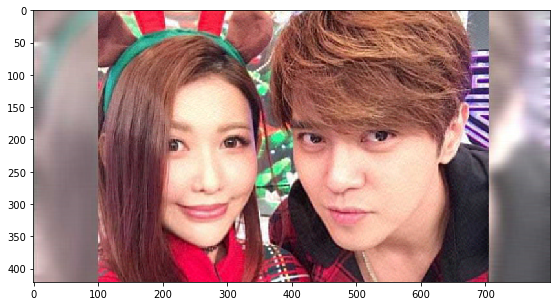

In [187]:
fig = plt.figure(figsize=(10,5))
a = fig.add_subplot(1, 1, 1)
imgplot = plt.imshow(img_reconstructed)

In [188]:
compressed_bytes = sum([matrix.nbytes for matrix in 
                        [U_r_k, S_r_k, V_r_k, U_g_k, S_g_k, V_g_k, U_b_k, S_b_k, V_b_k]])

In [191]:
ratio = compressed_bytes / original_bytes
ratio

0.36282660332541566

## 借貸俱樂部資料

In [1]:
import pandas as pd
dataset = pd.read_csv('data/LoanStats3b.csv', skiprows=1)


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (0,47,123,124,125,128,129,130,133) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
dataset = dataset.iloc[:,2:111] 

In [3]:
empty_cols = [i for i in range(45,72)]  

In [4]:
dataset = dataset.drop(dataset.columns[empty_cols],axis=1)

In [5]:
data_with_loanstatus_sliced = dataset[dataset['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [6]:
di = {"Fully Paid":0, "Charged Off":1}   
Dataset_withBoolTarget= data_with_loanstatus_sliced.replace({"loan_status": di})

In [7]:
dataset=Dataset_withBoolTarget 

In [8]:
del_col_names = ["delinq_2yrs",  "last_pymnt_d", "chargeoff_within_12_mths","delinq_amnt","emp_title", "term", "emp_title", "pymnt_plan","purpose","title", "zip_code", "verification_status", "dti","earliest_cr_line", "initial_list_status", "out_prncp",
"pymnt_plan", "num_tl_90g_dpd_24m", "num_tl_30dpd", "num_tl_120dpd_2m", "num_accts_ever_120_pd", "delinq_amnt", 
"chargeoff_within_12_mths", "total_rec_late_fee", "out_prncp_inv", "issue_d"] 
dataset = dataset.drop(labels = del_col_names, axis = 1) 
print("Current shape of dataset :",dataset.shape)

Current shape of dataset : (188171, 60)


In [9]:
features = ['funded_amnt','emp_length','annual_inc','home_ownership','grade',
            "last_pymnt_amnt", "mort_acc", "pub_rec", "int_rate", "open_acc","num_actv_rev_tl",
            "mo_sin_rcnt_rev_tl_op","mo_sin_old_rev_tl_op","bc_util","bc_open_to_buy",
            "avg_cur_bal","acc_open_past_24mths",'loan_status'] #'sub_grade' #selecting final features #'addr_state''tax_liens',
Final_data = dataset[features] #19 features with target var
Final_data["int_rate"] = Final_data["int_rate"].apply(lambda x:float(x[:-1]) ) #reomving % sign, conv to float  - int_rate column
Final_data= Final_data.reset_index(drop=True)
print("Current shape of dataset :",Final_data.shape)

Current shape of dataset : (188171, 18)


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
Final_data.head()

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,12000.0,3 years,96500.0,MORTGAGE,A,2927.22,1.0,0.0,7.62,17.0,5.0,10.0,118.0,83.5,2441.0,11783.0,4.0,0
1,27050.0,10+ years,55000.0,OWN,B,6074.19,4.0,0.0,10.99,14.0,4.0,16.0,326.0,53.9,16473.0,9570.0,3.0,0
2,12000.0,10+ years,130000.0,MORTGAGE,B,398.28,3.0,0.0,11.99,9.0,5.0,4.0,193.0,93.0,3567.0,36362.0,4.0,0
3,28000.0,5 years,325000.0,MORTGAGE,A,23915.86,5.0,0.0,7.62,15.0,5.0,5.0,229.0,67.1,13901.0,53306.0,6.0,0
4,12000.0,4 years,60000.0,RENT,B,3775.55,0.0,0.0,10.99,15.0,7.0,1.0,48.0,15.9,15216.0,476.0,8.0,0


In [11]:
Final_data['grade'] = Final_data['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})
Final_data["home_ownership"] =  Final_data["home_ownership"].map({"MORTGAGE":6,"RENT":5,"OWN":4,"OTHER":3,"NONE":2,"ANY":1})
Final_data["emp_length"] = Final_data["emp_length"].fillna('0')
Final_data["emp_length"] = Final_data["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
Final_data["emp_length"] = Final_data["emp_length"].apply(lambda x:int(x))
Final_data.fillna(Final_data.mean(),inplace = True)
print("Current shape of dataset :",Final_data.shape)

Current shape of dataset : (188171, 18)


In [12]:
Final_data.head()

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,12000.0,3,96500.0,6,7,2927.22,1.0,0.0,7.62,17.0,5.0,10.0,118.0,83.5,2441.0,11783.0,4.0,0
1,27050.0,10,55000.0,4,6,6074.19,4.0,0.0,10.99,14.0,4.0,16.0,326.0,53.9,16473.0,9570.0,3.0,0
2,12000.0,10,130000.0,6,6,398.28,3.0,0.0,11.99,9.0,5.0,4.0,193.0,93.0,3567.0,36362.0,4.0,0
3,28000.0,5,325000.0,6,7,23915.86,5.0,0.0,7.62,15.0,5.0,5.0,229.0,67.1,13901.0,53306.0,6.0,0
4,12000.0,4,60000.0,5,6,3775.55,0.0,0.0,10.99,15.0,7.0,1.0,48.0,15.9,15216.0,476.0,8.0,0


In [13]:
from sklearn import preprocessing,metrics 
scl = preprocessing.StandardScaler()  # (x - u) / std
fields = Final_data.columns.values[:-1]
data_clean = pd.DataFrame(scl.fit_transform(Final_data[fields]), columns = fields)
data_clean['loan_status'] = Final_data['loan_status']
data_clean['loan_status'].value_counts()

0    158503
1     29668
Name: loan_status, dtype: int64

In [14]:
loanstatus_0 = data_clean[data_clean["loan_status"]==0]
loanstatus_1 = data_clean[data_clean["loan_status"]==1]

In [15]:
subset_of_loanstatus_0 = loanstatus_0.sample(n=5500)
subset_of_loanstatus_1 = loanstatus_1.sample(n=5500)
data_clean = pd.concat([subset_of_loanstatus_1, subset_of_loanstatus_0])

In [16]:
data_clean.head()

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
5480,-0.342253,0.861006,-0.718429,-0.671988,0.587619,-0.646556,-0.842589,-0.261387,-0.321847,-0.000176,1.233551,-0.677865,-0.460918,-0.727469,0.504210,-0.718067,-0.357007,1
83918,2.545217,-0.808437,0.612981,0.882600,-0.965556,-0.561883,0.553193,-0.261387,0.786940,0.216861,-0.621610,3.345779,1.838302,1.211923,-0.572019,0.883852,-0.741100,1
18715,-0.289865,-1.086677,-0.699133,0.882600,-0.965556,-0.661263,-0.842589,-0.261387,0.784687,-0.434251,0.120454,-0.208440,-1.346179,1.082369,-0.603211,-0.767185,0.027086,1
27228,-0.721291,1.139246,-0.120259,0.882600,-0.965556,-0.660154,1.483714,-0.261387,0.962724,1.519084,1.604583,-0.476683,-0.583871,1.172664,-0.600489,0.382426,1.179365,1
153926,-0.536394,1.139246,-0.544766,0.882600,0.587619,-0.655397,1.483714,-0.261387,-0.263253,-0.217214,0.120454,-0.342561,2.194865,1.050961,-0.605934,0.504196,-0.741100,1


In [17]:
data_clean = data_clean.sample(frac=1).reset_index(drop=True)

In [18]:
data_clean.head()

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,-0.536394,1.139246,-0.621950,-0.671988,-0.188969,0.402072,-0.842589,-0.261387,0.563830,-1.302399,-0.621610,-3.425611e-01,-1.690447e+00,6.544462e-01,-5.785533e-01,-7.651355e-01,0.027086,0
1,-1.029452,1.139246,-0.236034,0.882600,0.587619,-0.678536,-0.377328,2.199609,-0.290296,-0.434251,-0.250578,-2.755004e-01,-5.592800e-01,-5.221482e-02,-4.817113e-01,7.100552e-01,0.027086,1
2,1.928895,0.026285,-0.100963,0.882600,-2.518731,0.302121,-0.377328,-0.261387,2.544774,2.604269,0.862519,-8.119862e-01,-5.517304e-02,1.062739e+00,-5.412945e-01,-3.828353e-01,0.411179,0
3,1.928895,-1.364918,0.149882,-0.671988,1.364207,-0.550223,0.000000,-0.261387,-1.212032,-0.868325,0.000000,1.191238e-16,3.494532e-16,-4.295854e-14,1.414896e-16,-2.404980e-16,0.000000,1
4,1.682366,1.139246,0.651114,-0.671988,-0.188969,-0.582565,-0.842589,-0.261387,0.674258,-0.434251,-0.250578,-2.084397e-01,1.813711e+00,5.327434e-01,-3.608339e-01,-7.067625e-01,0.795272,1


## 什麼樣的資料能夠被分析
- 結構化資料
- 所有資料不能有缺失值
- 所有資料皆為數值資料

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean.iloc[:,:-1], data_clean.iloc[:,-1], test_size=0.2, random_state=42)


In [20]:
data_clean.shape

(11000, 18)

### 特徵篩選 (Feature Selection)

In [31]:
from sklearn import linear_model,svm
from sklearn.feature_selection import RFE

# create the RFE model and select 3 attributes
clf_LR = linear_model.LogisticRegression(C=1e30)
clf_LR.fit(X_train,y_train)

rfe = RFE(clf_LR, 10)
rfe = rfe.fit(data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True False  True  True False False  True  True False False
 False  True  True False  True]
[1 1 1 6 1 1 2 7 1 1 3 8 4 1 1 5 1]


In [32]:
LR_features = X_train.columns[rfe.ranking_ == 1]

In [33]:
from sklearn import linear_model,svm, tree
from sklearn.feature_selection import RFE

# create the RFE model and select 3 attributes
clf_tree = tree.DecisionTreeClassifier(max_depth = 5)
clf_tree.fit(X_train,y_train)

rfe = RFE(clf_tree, 10)
rfe = rfe.fit(data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True False  True False False  True  True False  True  True False  True
  True False False  True  True]
[1 8 1 7 6 1 1 5 1 1 4 1 1 3 2 1 1]


In [34]:
TREE_features =X_train.columns[rfe.ranking_ == 1]

In [35]:
LR_features

Index(['funded_amnt', 'emp_length', 'annual_inc', 'grade', 'last_pymnt_amnt',
       'int_rate', 'open_acc', 'bc_util', 'bc_open_to_buy',
       'acc_open_past_24mths'],
      dtype='object')

In [36]:
TREE_features

Index(['funded_amnt', 'annual_inc', 'last_pymnt_amnt', 'mort_acc', 'int_rate',
       'open_acc', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_old_rev_tl_op',
       'avg_cur_bal', 'acc_open_past_24mths'],
      dtype='object')

In [38]:
set(LR_features) - set(TREE_features)

{'bc_open_to_buy', 'bc_util', 'emp_length', 'grade'}

In [39]:
set(TREE_features) - set(LR_features)

{'avg_cur_bal', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mort_acc'}

In [214]:
from sklearn.feature_selection import RFECV
rfe2 = RFECV(clf_LR, step=1, cv = 5)
rfe2.fit(data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values)

RFECV(cv=5,
   estimator=LogisticRegression(C=1e+30, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [216]:
rfe2.support_.sum()

6

In [217]:
print(rfe2.ranking_)

[ 1  8  1 10  1  1  5 12  1  6 11  7  4  2  3  9  1]


### 特徵萃取 (Feature Extraction)

In [40]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=10, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [41]:
explained_variance = pca.explained_variance_ratio_
print('Expected Variance is '+ str(explained_variance))

Expected Variance is [0.17032312 0.15672491 0.12523976 0.07676097 0.07175706 0.06006525
 0.0561092  0.04600325 0.04233717 0.03819892]


## 特徵篩選

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
randomForest = RandomForestClassifier(bootstrap=True,criterion = "gini",max_features=10,random_state=0 )
randomForest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [45]:
randomForest.feature_importances_

array([0.05323467, 0.022283  , 0.04966102, 0.00791355, 0.03391758,
       0.44590079, 0.02009625, 0.00471734, 0.07159057, 0.03175484,
       0.02383945, 0.03445347, 0.04280763, 0.040791  , 0.04182649,
       0.04442893, 0.03078341])

In [51]:
features = len(randomForest.feature_importances_)

Text(0, 0.5, 'Normalized Gini Importance')

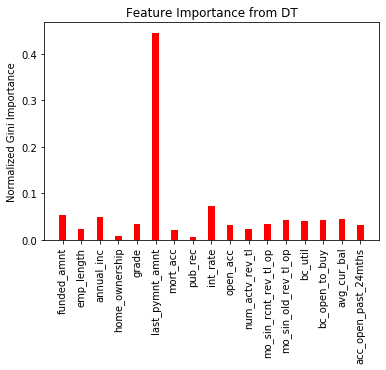

In [53]:
from matplotlib import pyplot as plt
import numpy as np
fig, ax = plt.subplots()
width=0.35
features = X_train.columns
ax.bar(np.arange(len(features)), randomForest.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(randomForest.feature_importances_)))
ax.set_xticklabels(X_train.columns.values,rotation=90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')
